In [39]:
#the code should be executed by running each cell

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
# Loading the dataset
data = pd.read_csv("time_series_covid19_confirmed_global.csv")
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


### Top 3 most infected countries

In [41]:
#obtaining top 3 infected countries
# Selecting columns relevant for analysis
date_columns = data.columns[4:]  
country_column = "Country/Region"  
province_column = "Province/State" 

# Group by country and sum the infected cases across all provinces
grouped_data = data.groupby(country_column)[date_columns].sum()
grouped_data["Total Infected"] = grouped_data.sum(axis=1)

# Select top three infected countries
top_three_countries = grouped_data.nlargest(3, "Total Infected")
top_three_countries



,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Total Infected
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702,53813184406
India,0,0,0,0,0,0,0,0,1,1,...,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738,29131119694
Brazil,0,0,0,0,0,0,0,0,0,0,...,37063464,37063464,37081209,37081209,37081209,37076053,37076053,37076053,37076053,21182690594


In [57]:
#loading the data again and transposing for easier analysis
# Grouping by region (also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_country = data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [44]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)
# Check out index
confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09'],
              dtype='datetime64[ns]', length=1143, freq=None)

In [45]:
#grouping dates into weeks
weekly_data = confirmed_country.resample('W').sum()
weekly_data['Week Number'] = range(1, len(weekly_data) + 1)
weekly_data.set_index('Week Number', inplace=True)


### fitting linear regression model for the 3 most infected countries and visualizing the models

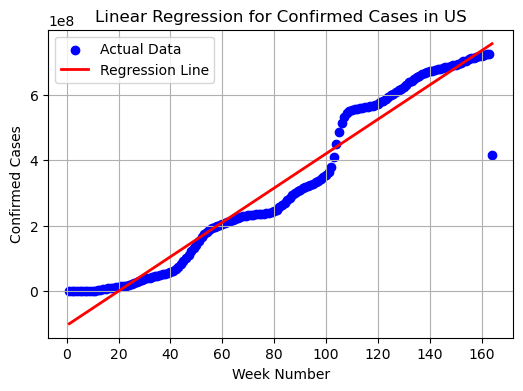

Country: US
Coefficient: [5247811.99342701]
Intercept: [-1.04815316e+08]
Mean Squared Error: 2806431562316389.0



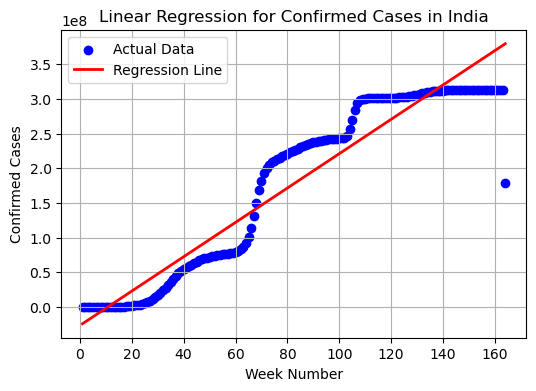

Country: India
Coefficient: [2476415.85287228]
Intercept: [-26675529.2400119]
Mean Squared Error: 1338501689664814.2



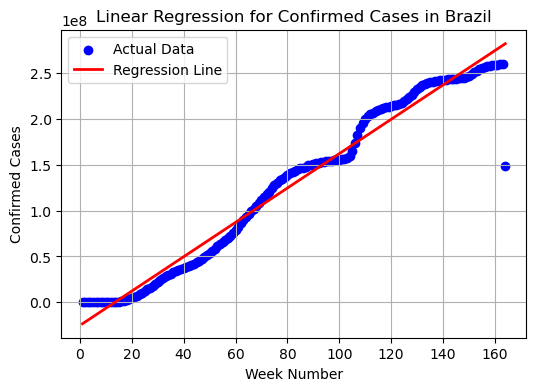

Country: Brazil
Coefficient: [1870316.17004611]
Intercept: [-25138336.5044142]
Mean Squared Error: 237773874657368.0



In [46]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Assuming grouped_data is already defined and contains the grouped data

# Define the countries of interest
countries = ["US", "India", "Brazil"]

# Iterate over the countries
for country in countries:
    # Extract the time-series data for the country
    country_data = weekly_data[country]
    
    # Prepare the data for regression
    X = country_data.index.values.reshape(-1, 1)  # Week numbers
    y = country_data.values.reshape(-1, 1)       # Confirmed cases

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values using the model
    y_pred = model.predict(X)

    # Plot the regression line
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(f'Linear Regression for Confirmed Cases in {country}')
    plt.xlabel('Week Number')
    plt.ylabel('Confirmed Cases')
    plt.legend()
    plt.grid(True)
    plt.show()

    
    # Calculate mean squared error
    mse = mean_squared_error(y, y_pred)
    # Print the results
    print(f"Country: {country}")
    print(f"Coefficient: {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mse}")
    print()


### visualizing top 3 infected countries using bar plot

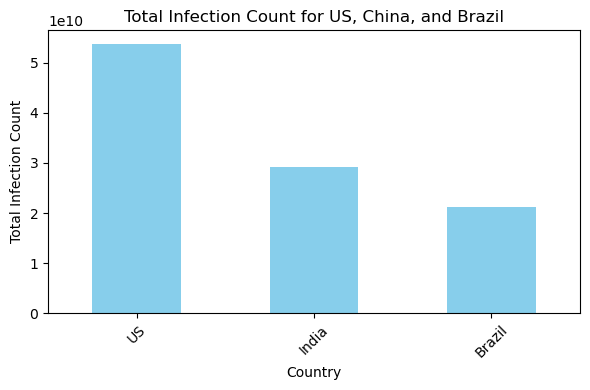

In [47]:
#visualizing top 3 infected countries
import matplotlib.pyplot as plt

# Sum the weekly infection data for the four countries
total_infections = weekly_data[["US", "India", "Brazil"]].sum()

# Plot the total infection count for each country
plt.figure(figsize=(6, 4))
total_infections.plot(kind='bar', color='skyblue')
plt.title("Total Infection Count for US, China, and Brazil")
plt.xlabel("Country")
plt.ylabel("Total Infection Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Running KMeans Algorithm for most infected country(US)

In [48]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [49]:
country_data = weekly_data["US"]
# Reshape the data for clustering
P= country_data.values.reshape(-1, 1)
X = pd.DataFrame(P, columns=["US"])

In [50]:
# Elbow Method to determine the number of clusters for KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

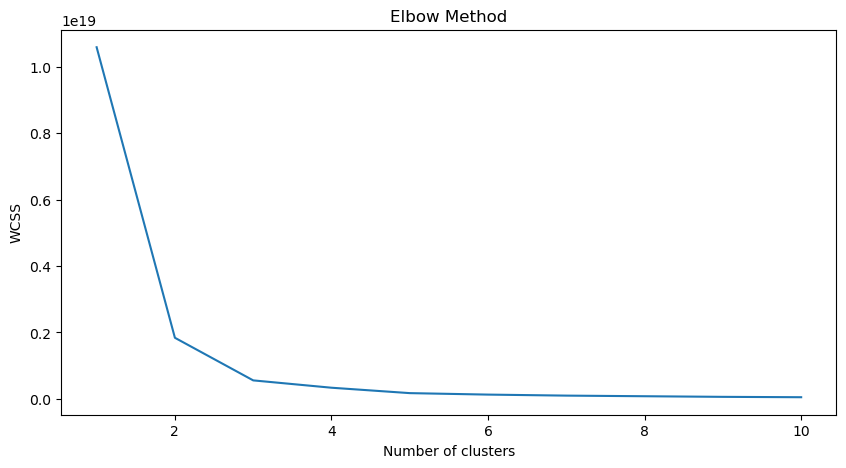

In [51]:
# Plotting the Elbow Method results to visualize the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [52]:
# Assuming the optimal number of clusters is 3 (based on the Elbow Method)
optimal_clusters = 3


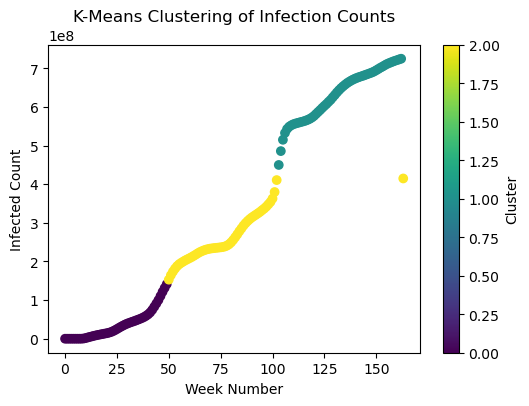

In [53]:
# Perform K-Means clustering with the chosen K value
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(6, 4))
plt.scatter(range(len(X)), X, c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering of Infection Counts')
plt.xlabel('Week Number')
plt.ylabel('Infected Count')
plt.colorbar(label='Cluster')
plt.show()

### GRAPH ANALYTICS

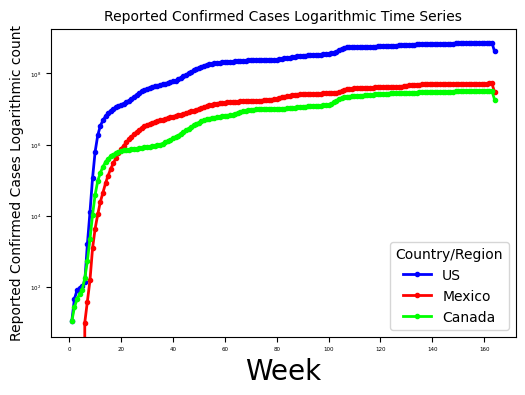

In [54]:
# Plot time series of several countries of interest
poi = ["US","Mexico", "Canada"]
weekly_data[poi].plot(figsize=(6,4), linewidth=2, marker='.', colormap='brg', fontsize=4, logy=True)
plt.xlabel('Week', fontsize=20);
plt.ylabel('Reported Confirmed Cases Logarithmic count', fontsize=10);
plt.title('Reported Confirmed Cases Logarithmic Time Series', fontsize=10);

### Obtaining cluster plots for the three most infected countries

In [55]:
kmeans_clusters = kmeans.labels_

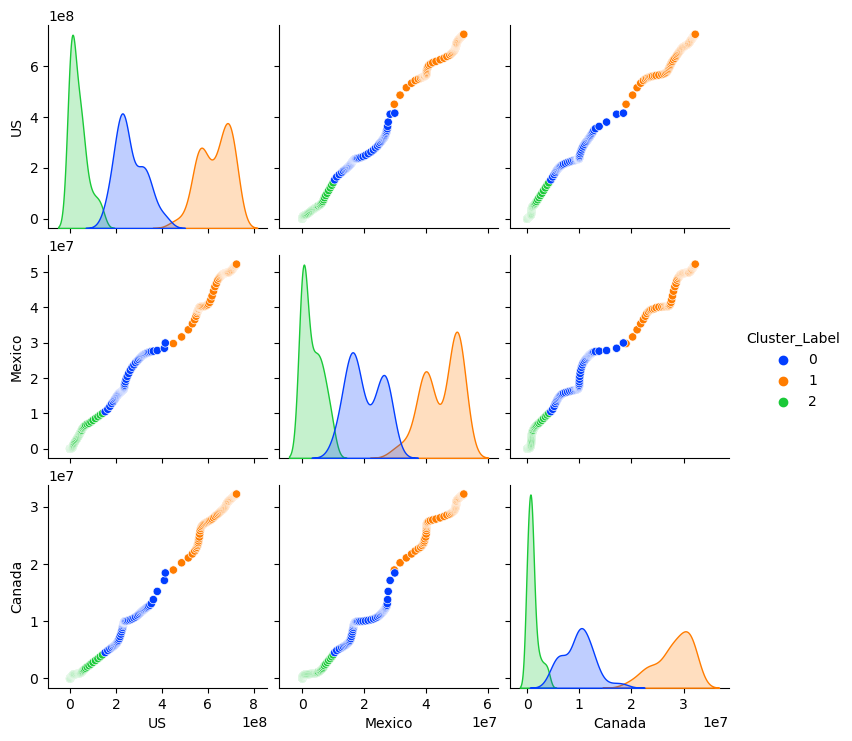

In [56]:
country_data = weekly_data[["US", "Mexico", "Canada"]]

# Reshape the data for clustering
X = country_data.values.reshape(-1, len(country_data.columns))
X = pd.DataFrame(X, columns=["US", "Mexico", "Canada"])

# Elbow Method to determine the number of clusters for KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    # KMeans Clustering with determined number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
kmeans
# Hierarchical Clustering with the same number of clusters
hier_cluster = AgglomerativeClustering(n_clusters=optimal_clusters)
hier_labels = hier_cluster.fit_predict(X)
# The 'kmeans_labels' and 'hier_labels' variables contain the cluster labels assigned to each sample in the dataset
# Convert the dataset to a DataFrame and add the cluster labels

X['Cluster_Label'] = kmeans_labels

# Visualize the results using seaborn's pairplot
sns.pairplot(X, hue='Cluster_Label',palette='bright')
plt.show()


## Advice to neighbouring countries